In [1]:
import pandas as pd
import plotly.express as px


df = pd.read_csv("T_games_dataset_full_categories.csv")
df.head(1)

,id,client_id,order_day,category_id,category_name,good_id,good_name,good_price,good_cnt,gender_cd,age,education_level,city_nm,monthly_income_amt,steam_popularity_score
0,1500571355,5-25R6ZT3L9,2023-05-22,29688,Скидки,890257,The Night of the Rabbit,299.0,1.0,M,28,UGR,Москва,73552,0.0


In [58]:
r = df[(df.age >= 15) & (df.age <= 40)]
r = r.groupby("category_name").good_price.sum().reset_index().sort_values("good_price", ascending=False)
d = r[:6].copy()
d.loc[6] = ("Другие категории", r[6:].good_price.sum())

r["percentage"] = r.good_price.apply(lambda x: (x / r.good_price.sum()) * 100)
r

,category_name,good_price,percentage
24,Экшн,32963820.46,24.169213
4,Бестселлеры,16862713.76,12.363813
15,Приключения,15636295.94,11.464599
18,Скидки,15400531.03,11.291735
16,Ролевые (RPG),15036582.82,11.024886
20,Стратегии,9961331.76,7.303691
8,Инди,7897824.51,5.790719
17,Симуляторы,7230210.63,5.301221
23,Шутеры,3518837.23,2.580026
12,Новинки,2354676.16,1.726459


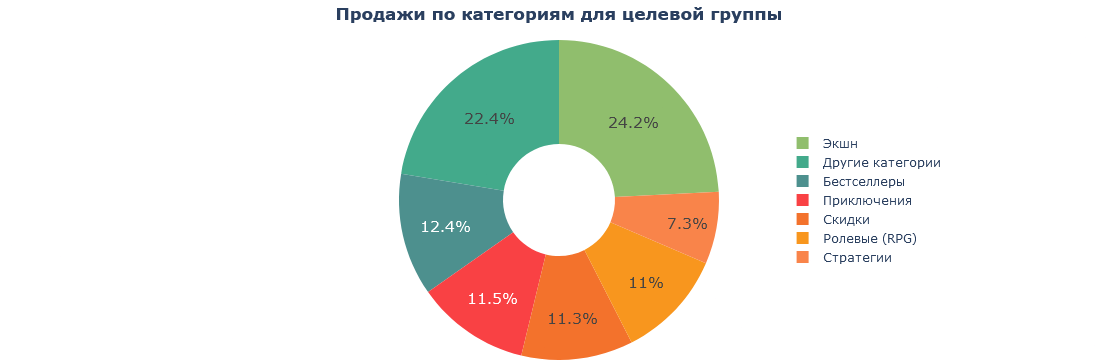

In [90]:
fig = px.pie(d.sort_values("good_price", ascending=False), values="good_price",
             names="category_name", hover_name="category_name", hole=.35,
             title="<b>Продажи по категориям для целевой группы"
            )
fig.update_layout(margin=dict(t=40, b=0, l=0, r=0))
fig.update_traces(textfont_size=15)

fig.update_traces(
    hoverinfo="label+value",
    textinfo="percent",
    marker = dict(
        colors = [
            "#90BE6D",
            "#43AA8B",
            "#4D908E",
            "#F94144",
            "#F3722C",
            "#F8961E",
            "#F9844A"
        ]
    )
)

fig.update_layout(
    title_x = 0.5,
    legend=dict(
        y=0.5,
        x=0.7
    )
)

fig.show()